### <center> Домашнее задание №2
### <center> Визуальный анализ данных о сердечно-сосудистых заболеваниях. (Реализация на R)

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

Описание данных.

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

Возраст (age)
Рост (height)
Вес (weight)
Пол (gender)
Результаты измерения:

Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
Холестерин (cholesterol)
Глюкоза (gluc)
Субъективные признаки (со слов пациентов):

Курение (smoke)
Употребление алкоголя (alco)
Физическая активность (active)
Целевой признак (который интересно будет прогнозировать):

Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)
Возраст дан в днях. Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

---

В рамках задания для простоты будем работать только с обучающей выборкой. Чистить данные от выбросов и ошибок в данных НЕ нужно, кроме тех случаев, где об этом явно указано.

---

In [22]:
library(ggplot2)
library(corrplot)

In [23]:
df <- read.csv('mlbootcamp5_train.csv', sep=';')

In [20]:
head(df)

id age   gender height weight ap_hi ap_lo cholesterol gluc smoke alco active
1 0  18393 2      168    62     110    80   1           1    0     0    1     
2 1  20228 1      156    85     140    90   3           1    0     0    1     
3 2  18857 1      165    64     130    70   3           1    0     0    0     
4 3  17623 2      169    82     150   100   1           1    0     0    1     
5 4  17474 1      156    56     100    60   1           1    0     0    0     
6 8  21914 1      151    67     120    80   2           2    0     0    0     
  cardio
1 0     
2 1     
3 1     
4 1     
5 0     
6 0

### 1. Визуализируем корреляционную матрицу

* Для того чтобы лучше понять признаки в датасете, можно посчитать матрицу коэффициентов корреляции между признаками.

#### Какие два признака больше всего коррелируют (по Пирсону) с признаком `height` ?

- Gluc, Cholesterol
- Weight, Alco
- Smoke, Alco
- Weight, Gender

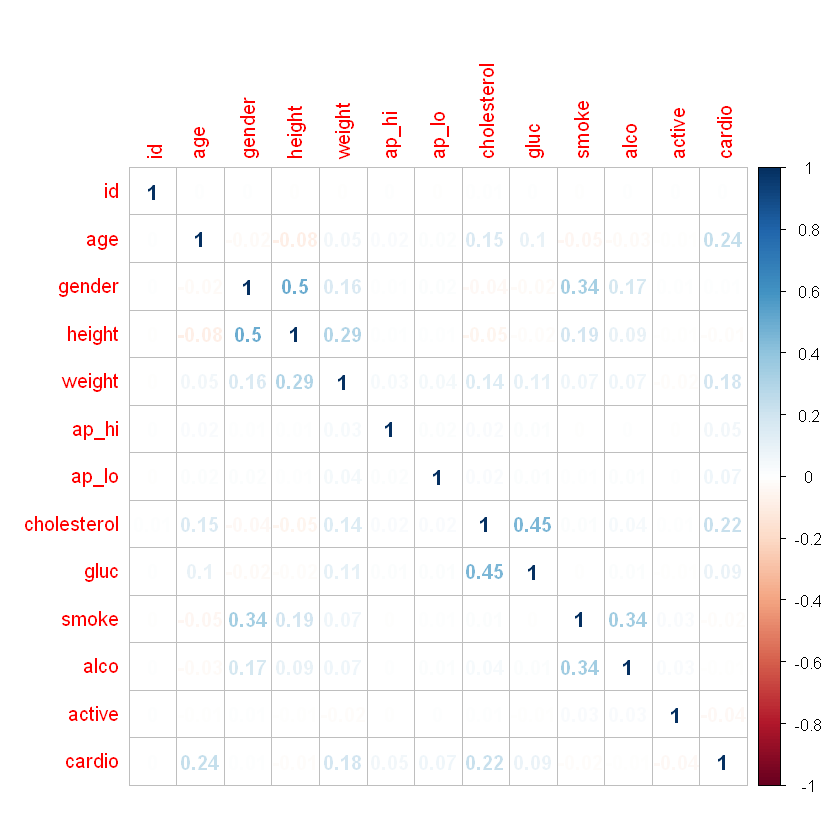

In [26]:
G <- cor(df, method='pearson')
corrplot(G, method='number')

Ответ: weight, gender

### 2. Распределение роста для мужчин и женщин
* Как мы увидели, в процессе исследования уникальных значений пол кодируется значениями 1 и 2, расшифровка изначально не была нам дана в описании данных, но мы догадались, кто есть кто, посчитав средние значения роста (или веса) при разных значениях признака gender. Теперь сделаем то же самое, но графически.

#### Постройте violinplot для роста и пола. 

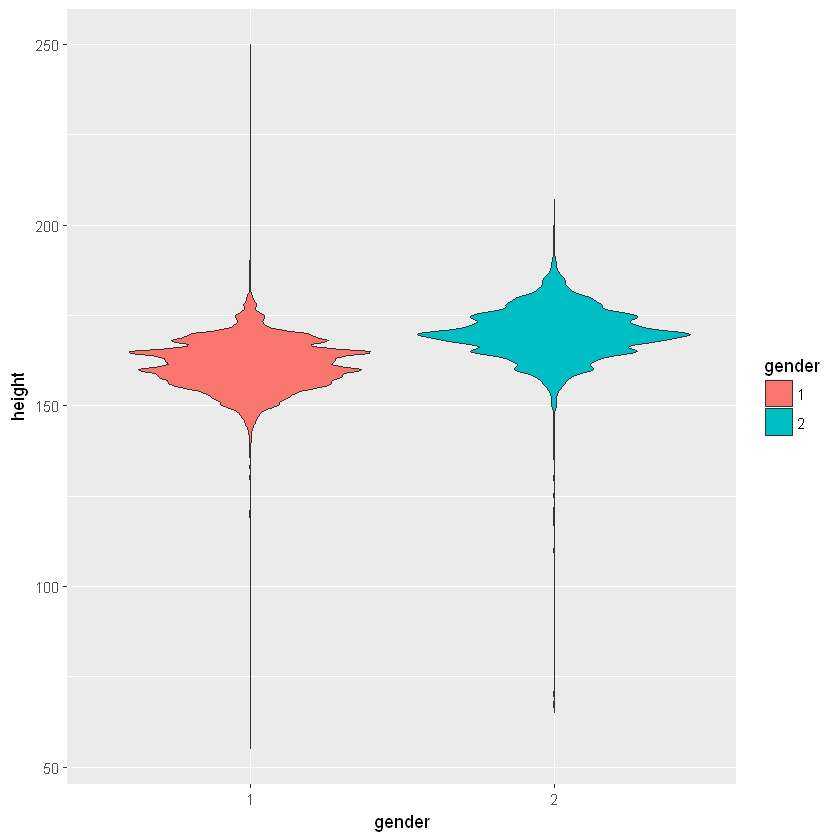

In [60]:
df$gender <- as.factor(df$gender)
ggplot(df, aes(x=gender, y=height, fill = gender)) + geom_violin()

* Постройте на одном графике два отдельных kdeplot роста, отдельно для мужчин и женщин. На нем разница будет более наглядной, но нельзя будет оценить количество мужчин/женщин.

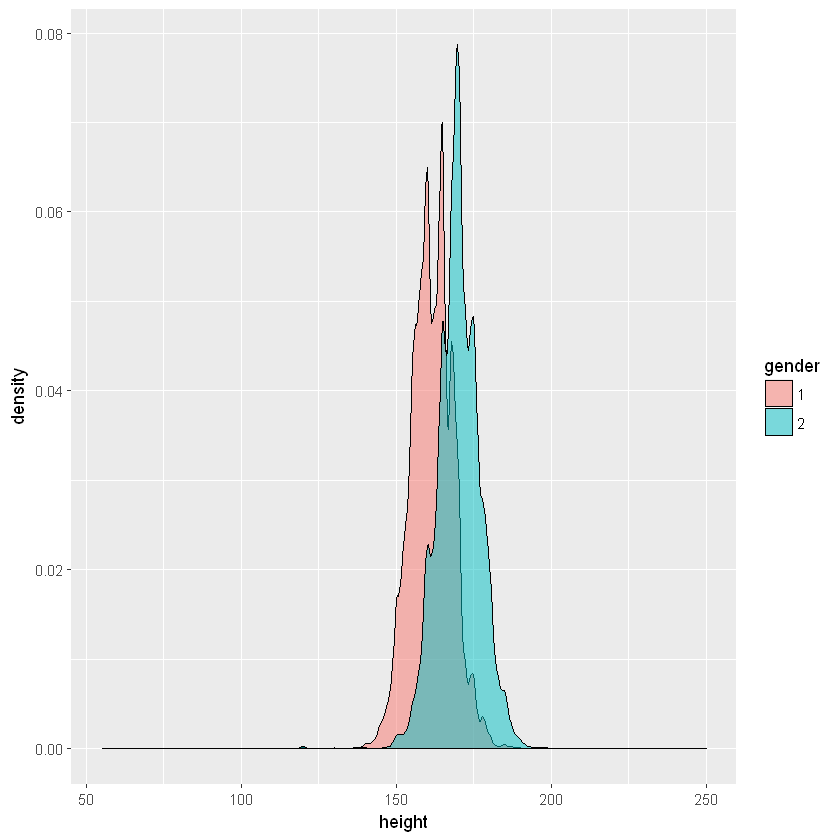

In [77]:
ggplot(data=df, aes(x = height, fill = gender)) + 
  geom_density(alpha = 0.5)

---

### 3. Ранговая корреляция
* В большинстве случаев достаточно воспользоваться линейным коэффициентом корреляции Пирсона для выявления закономерностей в данных, но мы пойдём чуть дальше и используем ранговую корреляцию, которая поможет нам выявить пары, в которых меньший ранг из вариационного ряда одного признака всегда предшествует большему другого (или наоборот, в случае отрицательной корреляции).

Постройте корреляционную матрицу, используя коэффициент Спирмена.
#### 3.1 Какие признаки теперь больше всего коррелируют (по Спирмену) друг с другом?
 * Height, Weight
 * Age, Weight
 * Ap_hi, Ap_lo
 * Cholesterol, Gluc
 * Cardio, Cholesterol
 * Smoke, Alco

In [78]:
M <- cor(df, method='spearman')
corrplot(M, method='number')

ERROR: Error in cor(df, method = "spearman"): 'x' must be numeric


Ответ: Ap_hi, Ap_lo

#### 3.2 Почему мы получили такое большое (относительно) значение ранговой корреляции у этих признаков?

- Неточности в данных (ошибки при сборе данных)
- Связь ошибочна, переменные никак не должны быть связаны друг с другом
- <b>Природа данных</b>

---

### 4. Совместное распределение признаков
* Постройте совместный график распределения jointplot двух наиболее коррелирующих между собой признаков (по Спирмену).

* Кажется, наш график получился неинформативным из-за выбросов в значениях. Постройте тот же график, но с логарифмической шкалой  (чтобы не получать OverflowError необходимо отфильтровать значения меньше либо равные нулю).

Warning message in self$trans$transform(x):
"созданы NaN"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message in self$trans$transform(x):
"созданы NaN"Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 8 rows containing missing values (geom_point)."

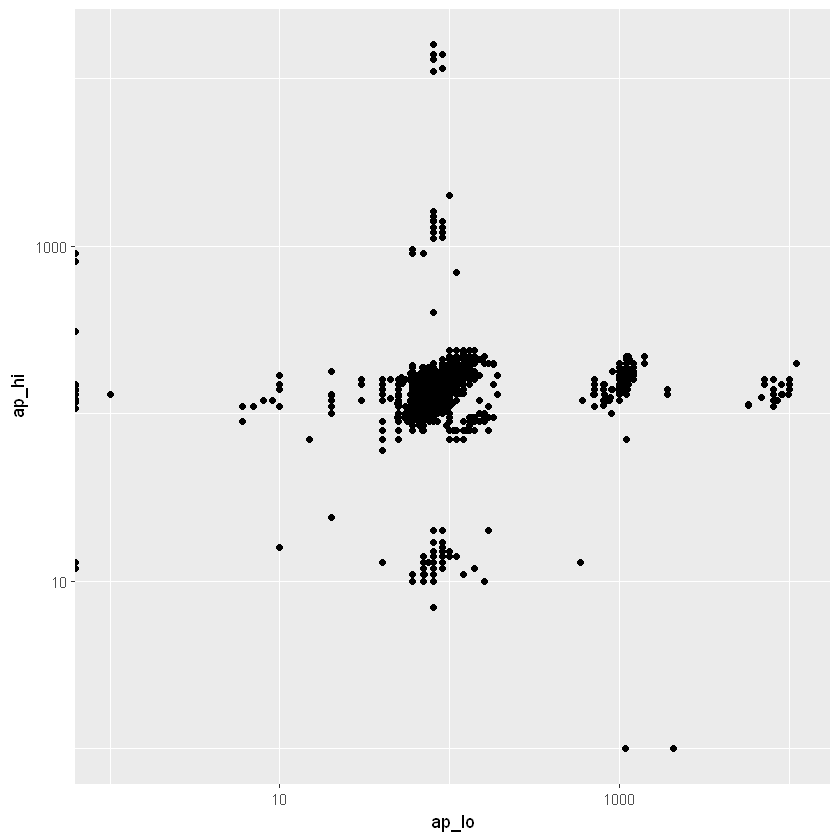

In [39]:
ggplot(df, aes(x=ap_lo, y=ap_hi)) + geom_point() + 
  scale_y_log10() +
  scale_x_log10()

* 4.1 Сколько чётко выраженных кластеров получилось на совместном графике выбранных признаков, с логарифмической шкалой? Под кластером в данной задаче понимается плотное скопление точек, в окрестности которого пренебрежительно мало одиночных наблюдений и которое визуально отделимо от других кластеров.
  * 1
  * 2
  * 3
  * <b>больше трёх</b>

---

### 5. Возраст
* Посчитаем, сколько полных лет было респондентам на момент их занесения в базу.

In [41]:
df$age_years <- as.integer(df$age / 365.25)
head(df, 5)

id age   gender height weight ap_hi ap_lo cholesterol gluc smoke alco active
1 0  18393 2      168    62     110    80   1           1    0     0    1     
2 1  20228 1      156    85     140    90   3           1    0     0    1     
3 2  18857 1      165    64     130    70   3           1    0     0    0     
4 3  17623 2      169    82     150   100   1           1    0     0    1     
5 4  17474 1      156    56     100    60   1           1    0     0    0     
  cardio age_years
1 0      50       
2 1      55       
3 1      51       
4 1      48       
5 0      47

* Постройте Countplot, где на оси абсцисс будет отмечен возраст, на оси ординат – количество. Каждое значение возраста должно     иметь два столбца, соответствующих количеству человек каждого класса cardio (здоров/болен) данного возраста.

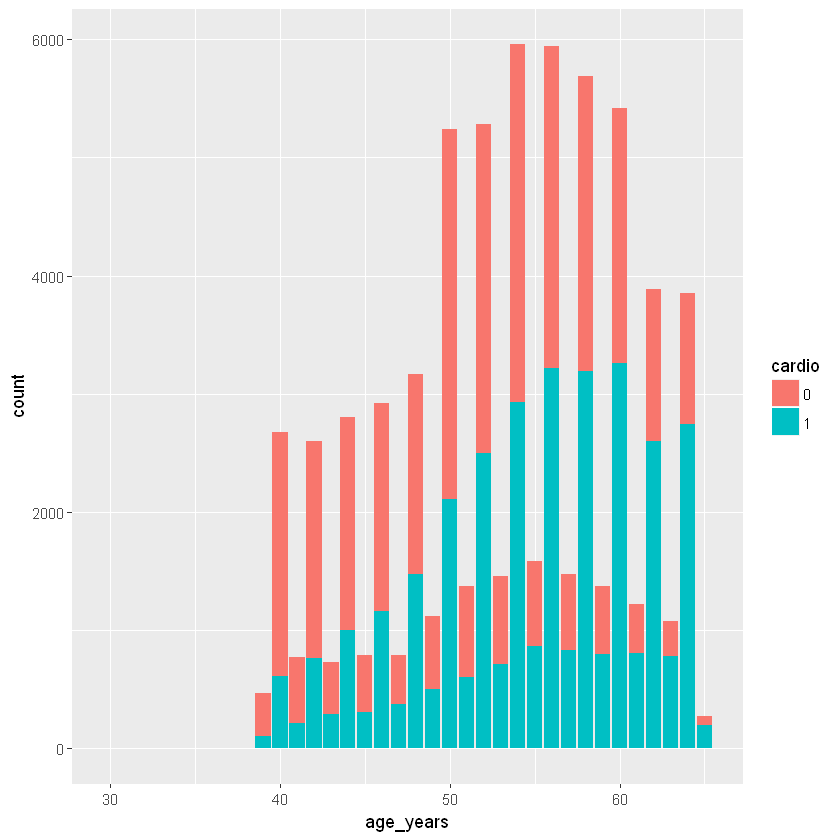

In [56]:
df$age_years = round(df$age / 365.25)
ggplot(df, aes(x = age_years, fill = cardio)) + stat_count() + geom_bar()

#### 5. В каком возрасте количество пациентов с ССЗ  впервые становится больше, чем здоровых?
- 44
- 49
- <b>53</b>
- 62